In [1]:
import sys
sys.path.append("../")

import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from datasets.kitti_copy import KITTIDatasetConfig, KITTIDetectionDataset

/home/meet.ranoliya/lexper/SOTAs/3detr/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config = KITTIDatasetConfig()
dataset = KITTIDetectionDataset(
    dataset_config=config,
    split_set="train",
    root_dir="/common/dataset/kitti/object",
    augment=False,
)

In [7]:
DIFFICULTY_MAP = {
    0: "easy",
    1: "medium",
    2: "hard",
    -1: "none"
}

In [8]:
object_count = {}
difficulty_count = {}
object_type = []
difficulty_type = []
max_objects = 0
for index in tqdm(range(len(dataset))):
    data = dataset[index]
    n_objects = int(np.sum(data["gt_box_present"]))
    max_objects = max(max_objects, n_objects)
    for i in range(n_objects):
        name = config.class2type[data["gt_box_sem_cls_label"][i]]
        difficulty = DIFFICULTY_MAP[int(data["difficulty"][i])]
        object_count[name] = object_count.get(name, 0) + 1
        difficulty_count[difficulty] = difficulty_count.get(difficulty, 0) + 1
        object_type.append(name)
        difficulty_type.append(difficulty)

100%|██████████| 3712/3712 [06:36<00:00,  9.36it/s]


In [9]:
print(f"Max Objects in a Scene: {max_objects}")
print(f"Object Count: {object_count}")
print(f"Difficulty Count: {difficulty_count}")

Max Objects in a Scene: 10
Object Count: {'Pedestrian': 918, 'Car': 2643, 'Cyclist': 199, 'Van': 171, 'Misc': 84, 'Person_sitting': 20, 'Truck': 39, 'Tram': 26}
Difficulty Count: {'easy': 1672, 'none': 1233, 'medium': 781, 'hard': 414}


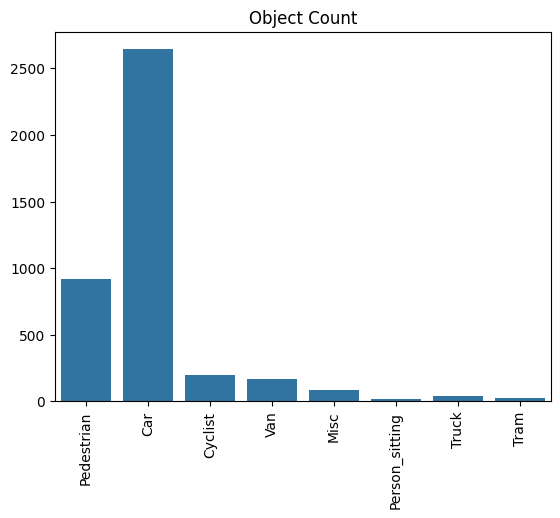

In [15]:
sns.barplot(x=object_count.keys(), y=object_count.values())
plt.xticks(rotation=90)
plt.title("Object Count")
plt.show()

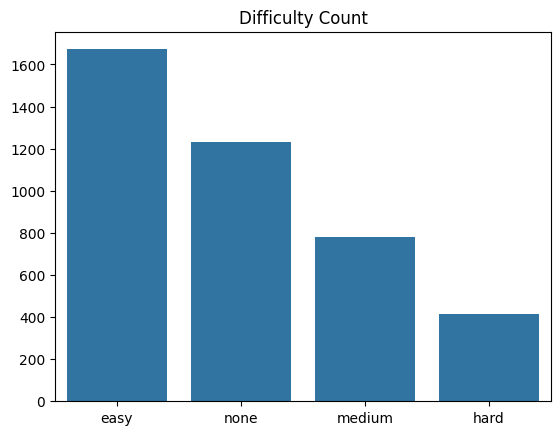

In [10]:
sns.barplot(x=difficulty_count.keys(), y=difficulty_count.values())
plt.title("Difficulty Count")
plt.show()

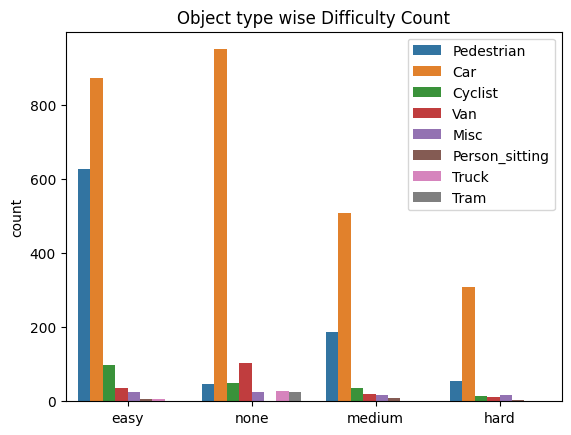

In [13]:
sns.countplot(x=difficulty_type, hue=object_type)
plt.title("Object type wise Difficulty Count")
plt.show()

In [4]:
# Number of points in 3D point cloud after processing
velodyne_dir = Path("/common/dataset/kitti/object/training/velodyne_processed")
point_count = []
for idx in tqdm(range(len(dataset))):
    filename = dataset.filenames[idx]
    point_cloud = np.fromfile(str(velodyne_dir / f"{filename}.bin"), dtype=np.float32).reshape((-1, 3))
    point_count.append(point_cloud.shape[0])

100%|██████████| 3712/3712 [00:18<00:00, 199.03it/s]


In [5]:
print(f"Max Point Cloud Points: {max(point_count)}")

Max Point Cloud Points: 14777


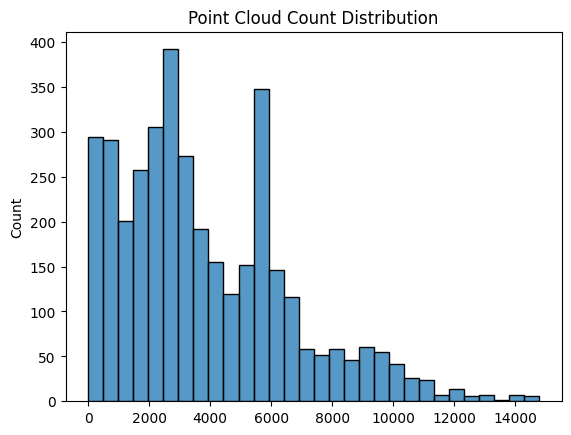

In [7]:
sns.histplot(point_count)
plt.title("Point Cloud Count Distribution")
plt.show()